# Unsupervised Learning: k-Means clustering 

**Unsupervised learning** gaat om het vinden van patronen in datasets waar vooraf géén gelabelde data of een bekende uitkomst wordt gebruikt bij het opstellen van een model. Zie video in de bronnen.

Een **cluster** verwijst naar een verzameling gegevenspunten die vanwege bepaalde overeenkomsten zijn samengevoegd.

In dit notebook vind je voorbeelden en opdrachten over het clusteren met **k-Means** en density clustering **DBSCAN** algoritmen.

Ook is een voorbeeld gegeven waarin clustering in de pre-processing fase wordt toegepast, wat een dimensie reductie teweegbrengt en een hogere performance geeft. Cool!

### Bronnen
* Unsupervised learning video: [Unsupervised Learning - Georgia Tech - Machine Learning](https://www.youtube.com/embed/1qtfILYSDJY)
* Scikit-learn documentatie: [clustering](https://scikit-learn.org/stable/modules/clustering.html?highlight=clustering)
* [Data Science Bookcamp](https://www.manning.com/books/data-science-bookcamphttps://www.manning.com/books/data-science-bookcamp), Leonard Apeltsin, Manning, 2021.
* [Python Data Science Book](https://github.com/jakevdp/PythonDataScienceHandbookhttps://github.com/jakevdp/PythonDataScienceHandbook), Jake Vanderplas, O'Reilly. Gratis te lezen op Github (link boektitel).

In [4]:
# inline video Unsupervised Learning:
from IPython.display import IFrame
IFrame('https://www.youtube.com/embed/1qtfILYSDJY', width=700, height=300)

In [5]:
# convenience functions and configuration
%matplotlib inline

import sys
import os
from pathlib import Path
from packaging import version
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

# Check Python and library versions
assert sys.version_info >= (3, 7)
# check scikit-learn version
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")


# helper functions to load Excel files.
# Excel CSV-file
def load_csv_pd_data(path, filename, 
                     names=None, 
                     delim_whitespace=False
                    ):
    '''
    load_csv_pd_data() - construct a pandas DataFrame object 
           from data in a Excel CSV file `filename`,
           stored in a folder `path`.
           @names: header-names of columns
    @returns: a pandas DataFrame
    '''
    csv_path = os.path.join(path, filename)
    # DEBUG: print(csv_path)
    return pd.read_csv(csv_path,
                       delim_whitespace=delim_whitespace,
                       names=names,
                      )

# Excel XLS-file
def load_xls_pd_data(path, filename, 
                     names=None
                    ):
    '''
    load_xls_pd_data() - construct a pandas DataFrame object 
           from data in a Excel xls-file `filename`,
           stored in a folder `path`.
    @returns: a pandas DataFrame
    '''
    xls_path = os.path.join(path, filename)
    # DEBUG: print(xls_path)
    return pd.read_excel(xls_path,
                         names=names
                        )


# Increase font size for plots
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


# Create the `images/training_linear_models` folder
IMAGES_PATH = Path() / "images" / "clustering"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## k-Means clustering

Het **k-Means** algoritme zoekt naar een vooraf bepaald aantal clusters binnen een ongelabelde multidimensionale dataset. Het bereikt dit met behulp van een eenvoudige opvatting van hoe de optimale clustering eruit ziet:

- Het "clustercentrum" is het rekenkundig gemiddelde van alle punten die tot het cluster behoren.
- Elk punt ligt dichter bij zijn eigen clustercentrum dan bij andere clustercentra.

---

### Voorbeeld - k-Means clustering

We nemen de `make_blobs` dataset uit scikit-learn als 1ste voorbeeld van k-Means clustering.

De functie make_blobs uit de sklearn.datasets module wordt gebruikt om een synthetische dataset te genereren die bestaat uit clusters van punten. 

Het is handig voor het testen en visualiseren van clusteringalgoritmen zoals K-means en DBSCAN.

Hier zijn enkele belangrijke parameters van make_blobs:

1. n_samples (int of array-like, default=100):
        Aantal te genereren datapunten.
        Je kunt een integer opgeven (voor een gelijk aantal per cluster) of een array om het aantal punten per cluster aan te passen.

2. centers (int of array-like, default=3):
        Het aantal clusters (als integer) of een array met specifieke coördinaten voor de clustercentra.

3. cluster_std (float of array-like, default=1.0):
        De standaardafwijking van de clusters. Dit bepaalt hoe "ver uit elkaar" of verspreid de punten binnen een cluster liggen.

4. random_state (int, RandomState instance, or None, default=None):
        Zorgt voor reproduceerbare resultaten door de willekeurigheid te regelen.

5. n_features (int, default=2):
        Het aantal dimensies (features) van de datapunten.

6. shuffle (bool, default=True):
        Als True, worden de datapunten willekeurig door elkaar geschud.

7. return_centers (bool, default=False):
        Als True, retourneert het ook de werkelijke coördinaten van de centra.

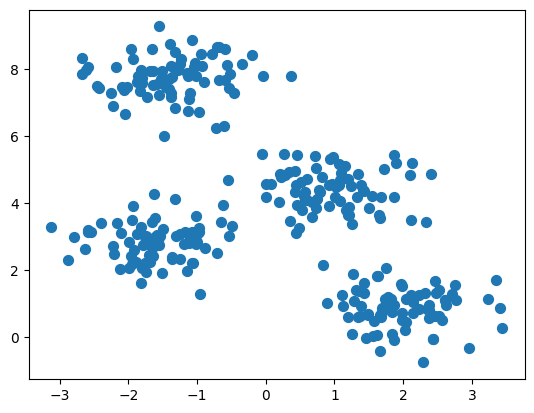

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# make a dataset of 300 blobs
# clustered around 4 centers
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)

# Dus nu bevat X de coördinaten (2-waardes dus!) en y bevat het label (0, 1, 2 of 3)

# make scatterplot
plt.scatter(X[:, 0], X[:, 1], s=50)


Op het oog is het makkelijk te zien dat er 4 clusters zijn. Wat doet het algorithm k-Means?

[]

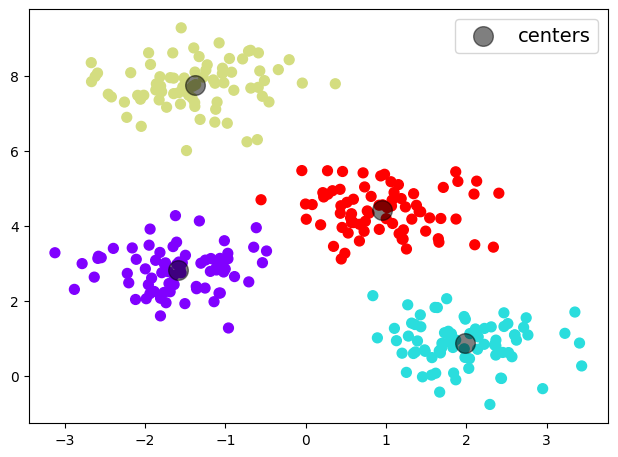

In [7]:
from sklearn.cluster import KMeans

est = KMeans(4)   # 4 clusters
# train = gebruik de coördinaten om te zien welke clusters er zijn
est.fit(X)
# predict = voor elke coördinaat ken je deze toe aan een bepaald cluster
y_kmeans = est.predict(X)
# plot
plt.scatter(X[:,0], X[:,1], c=y_kmeans,
            s=50, cmap='rainbow')

# plot the cluster centers...
centers = est.cluster_centers_
# print(centers)
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', s=200, alpha=0.5,
            label='centers'
           )
plt.legend()
# optional: save plot
save_fig("kMeans_clusters")
plt.plot()

Het k-Means algorithm zal (vaak) convergeren naar de optimale clustercentra.

Let op, de convergentie van dit algoritme is niet gegarandeerd; om die reden gebruikt scikit-learn standaard een groot aantal willekeurige initialisaties en vindt het de beste resultaten. 

Ook moet het aantal clusters vooraf worden ingesteld. Er zijn andere clusteringalgoritmen waarvoor deze vereiste kan worden opgeheven.

### Voorbeeld: cijfers clusteren

Dataset: handgeschreven cijfers (digits)

We laten k-Means de dataset clusteren en kijken wat het algoritme vindt.

In [8]:
from sklearn.datasets import load_digits

# get the digits dataset
digits = load_digits()
est = KMeans(n_clusters=10)  # vraagje: waarom '10'?
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

Resultaat is 10 clusters in 64 dimensies. Ziet er goed uit! Laten we elk van deze clustercentra visualiseren.

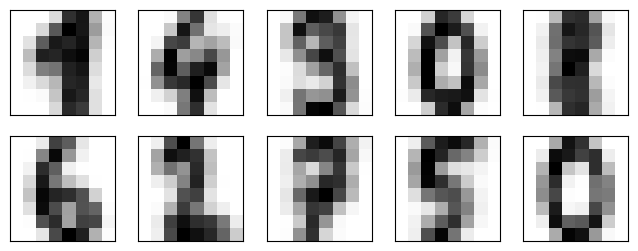

In [9]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1+i,
                         xticks=[], yticks=[]
                        )
    ax.imshow(est.cluster_centers_[i].reshape((8,8)),
              cmap=plt.cm.binary
             )
    

We zien dat zelfs **zonder de labels** k-Means in staat is clusters te vinden met herkenbare cijfers zijn (wel jammer van het getal 8).

### Voorbeeld: K-Means voor kleurencompressie

Hierbij een voorbeeld hoe je k-Means kan gebruiken om een beeld van 16 miljoen (256<sup>3</sup> kleuren kan 'comprimeren' tot een beeld met 64 kleuren. Intuitief voel je misschien aan dat kleuren geclusterd kunnen worden.

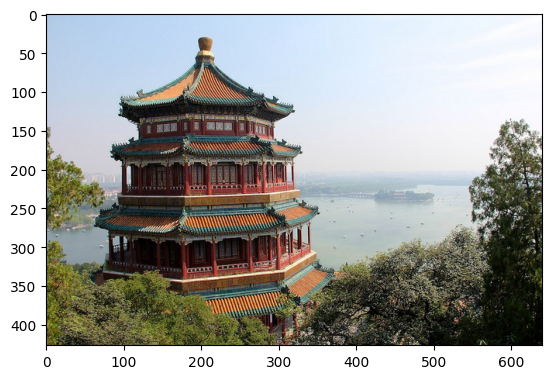

In [10]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
plt.imshow(china)
plt.grid(False)

In [11]:
# image is stored in a 3-dimensional array 
# of size (height, width, RGB):
china.shape

(427, 640, 3)

We kunnen ons dit beeld voorstellen als een wolk van punten in een driedimensionale kleurruimte. We zullen de kleuren opnieuw schalen zodat ze tussen 0 en 1 liggen, en we maken vervolgens de array geschikt voor scikit-learn.

In [12]:
X = (china / 255.0).reshape(-1, 3)
print(X.shape)

(273280, 3)


Geweldig, we hebben nu 273.280 punten in 3 dimensies.

De taak is om `KMeans` classifier te gebruiken om de 256<sup>3</sup> kleuren te comprimeren tot een kleiner aantal, zeg 64 kleuren. 

Kortom, we willen N<sub>color</sub> clusters in de gegevens vinden en een nieuwe afbeelding maken waarin de echte invoerkleur wordt vervangen door de kleur van de dichtstbijzijnde cluster.

We gebruiken `MiniBatchKMeans`, een meer geavanceerde *estimator*, dat beter presteert voor grotere datasets.

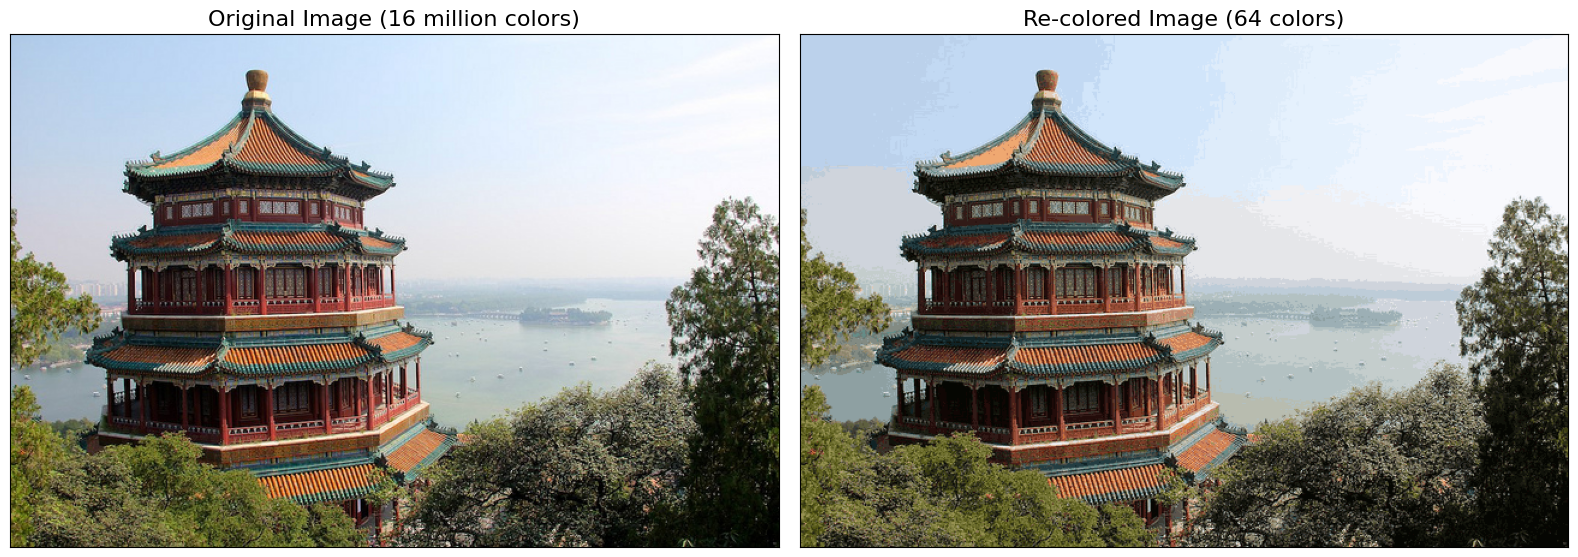

In [14]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

# reduce colors to 64:
n_colors = 64
model = MiniBatchKMeans(n_colors)
labels = model.fit_predict(X)
colors = model.cluster_centers_

new_image = colors[labels].reshape(china.shape)
new_image = (255 * new_image).astype(np.uint8)

# plot the original and the new recolored images
fig, ax = plt.subplots(1, 2,
                       figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[])
                      )
fig.subplots_adjust(wspace=0.05)
# left: original image
ax[0].imshow(china)
ax[0].set_title('Original Image (16 million colors)', size=16)
# right: re-colored image
ax[1].imshow(new_image)
ax[1].set_title(f'Re-colored Image ({n_colors} colors)', size=16);
# optional: save high-resolution image
save_fig("kMeans_colorcompression")

In het *Re-colored image (64 colors)* gaat zeker wat detail verloren, maar het algemene beeld is nog steeds goed herkenbaar. 

De afbeelding haalt een compressiefactor van ongeveer 1 miljoen! Hoewel dit een interessante toepassing van k-Means is, zijn er zeker betere manieren om informatie in afbeeldingen te comprimeren. Maar het voorbeeld toont de kracht van out-of-the-box denken met unsupervised-learning methoden zoals k-Means.

### Opdracht k-Means - kleurcompressie

Als je de help informatie van `load_sample_image()` leest, zie je dat er ook een ander plaatje ingelezen kan worden. Lees dit plaatje in en comprimeer dat plaatje ook tot 64 kleuren. Laat beide plaatjes zien.

Vervang `MiniBatchKMeans` door `KMeans` en kijk of de hypothese "...dat beter presteert voor grotere datasets" waar is. Zijn er andere verschillen?
> Tip: Maak gebruik van `%timeit` om de tijden voor `fit_predict()` te meten en te vergelijken.

In [ ]:
# hier komt jouw code...
